In [38]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import matplotlib.pyplot as plt  # 画图模块
import scipy.stats as stats # 统计模块
import scipy
from datetime import datetime # 时间模块
from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
import statsmodels.formula.api as smf  # OLS regression

#输出矢量图 渲染矢量图 是一个魔法函数（Magic Functions）内嵌绘图
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'

#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [39]:
data= pd.read_csv('D:\系统默认\桌面\python 课程\数据\数据1.csv') 
data['Day']=pd.to_datetime(data['Day'],format = '%Y/%m/%d')
data.set_index('Day',inplace= True) 
data.sort_values(by=['Day'],axis=0,ascending=True)#axis=1??? True是升序

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.05,99.98,95.79,99.98,126000,4.940000e+05
1990-12-20,99.98,104.30,104.39,99.98,104.39,19700,8.400000e+04
1990-12-21,104.39,109.07,109.13,103.73,109.13,2800,1.600000e+04
1990-12-24,109.13,113.57,114.55,109.13,114.55,3200,3.100000e+04
1990-12-25,114.55,120.09,120.25,114.55,120.25,1500,6.000000e+03
...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11


In [40]:
daily_data = data['1995-01':'2022-07'].copy()
daily_data['Close'] = pd.to_numeric(daily_data['Close'])
daily_data['Preclose'] = pd.to_numeric(daily_data['Preclose'])
# 计算000001上证指数日收益率 两种：
daily_data['Raw_return'] = daily_data['Close'] / daily_data['Preclose'] - 1
daily_data['Log_return'] = np.log(daily_data['Close']) - np.log(daily_data['Preclose'])
daily_data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return,Log_return
Day,,,,,,,,,
1995-01-03,647.87,637.72,647.71,630.53,639.88,23451800,1.806930e+08,-0.012333,-0.012409
1995-01-04,639.88,641.90,655.51,638.86,653.81,42222000,3.069230e+08,0.021770,0.021536
1995-01-05,653.81,655.38,657.52,645.81,646.89,43012300,3.015330e+08,-0.010584,-0.010641
1995-01-06,646.89,642.75,643.89,636.33,640.76,48748200,3.537580e+08,-0.009476,-0.009521
1995-01-09,640.76,637.52,637.55,625.04,626.00,50985100,3.985190e+08,-0.023035,-0.023305
...,...,...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11,-0.005988,-0.006006
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11,0.008322,0.008288
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11,-0.000513,-0.000513


In [41]:
Month_data = daily_data.resample('m')['Log_return'].sum().to_frame()
Month_data['Raw_return'] = np.exp(Month_data['Log_return']) - 1
Month_data.reset_index(inplace=True)
Month_data.rename(columns={'Day':'month'},inplace=True)
Month_data.set_index('month',inplace=True)
Month_data

,Log_return,Raw_return
month,,
1995-01-31,-0.141139,-0.131631
1995-02-28,-0.023979,-0.023694
1995-03-31,0.163651,0.177803
1995-04-30,-0.109315,-0.103552
1995-05-31,0.188901,0.207922
...,...,...
2022-03-31,-0.062604,-0.060685
2022-04-30,-0.065154,-0.063077
2022-05-31,0.044724,0.045739


In [42]:
Quarter_data = daily_data.resample('Q')['Log_return'].sum().to_frame()
Quarter_data['Raw_return'] = np.exp(Quarter_data['Log_return']) - 1
Quarter_data

,Log_return,Raw_return
Day,,
1995-03-31,-0.001467,-0.001466
1995-06-30,-0.025583,-0.025258
1995-09-30,0.135980,0.145660
1995-12-31,-0.263130,-0.231358
1996-03-31,0.001979,0.001981
...,...,...
2021-09-30,-0.006434,-0.006413
2021-12-31,0.019870,0.020069
2022-03-31,-0.112592,-0.106484


In [43]:
Year_data = daily_data.resample('Y')['Log_return'].sum().to_frame()
Year_data['Raw_return'] = np.exp(Year_data['Log_return']) - 1
Year_data

,Log_return,Raw_return
Day,,
1995-12-31,-0.154200,-0.142899
1996-12-31,0.501639,0.651425
1997-12-31,0.264019,0.302153
1998-12-31,-0.040505,-0.039695
1999-12-31,0.175423,0.191750
2000-12-31,0.416917,0.517277
2001-12-31,-0.230898,-0.206180
2002-12-31,-0.192575,-0.175167
2003-12-31,0.097735,0.102670


In [44]:
inflation=pd.read_csv('D:\系统默认\桌面\python 课程\数据\inflation.csv' ) 
inflation['month']=pd.to_datetime(inflation['month'],format = '%Y/%m/%d')
inflation.set_index('month',inplace= True) 
inflation.sort_values(by=['month'],axis=0,ascending=True)#axis=1??? True是升序

,cpi
month,
1987-01-31,5.1000
1987-02-28,5.4000
1987-03-31,5.8000
1987-04-30,6.7000
1987-05-31,7.6000
...,...
2022-04-30,2.1304
2022-05-31,2.1000
2022-06-30,2.5000


In [45]:
market_variance = daily_data.resample('M').apply({
    'Raw_return':
    lambda x: sum(x**2)
})
market_variance.reset_index(inplace=True)
market_variance.rename(columns={'Day':'month','Raw_return':'MV'},inplace=True)
market_variance.set_index('month',inplace=True)
market_variance


,MV
month,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2022-03-31,0.006740
2022-04-30,0.006234
2022-05-31,0.002035


In [46]:
cross = pd.read_csv('D:\系统默认\桌面\python 课程\数据\cross_section.csv')
cross['month'] = pd.to_datetime(cross['month'],format='%Y-%m-%d')#日期化
cross['to_v'] = pd.to_numeric(cross['to_v'])#方便计算数字化
cross['floatingvalue'] = pd.to_numeric(cross['floatingvalue'])
cross = cross.dropna(subset=['to_v','floatingvalue'])#去掉这两个变量里面缺失的行
cross

,Stkcd,month,floatingvalue,totalvalue,Return,rfmonth,Rank,Freq,ret,next_ret,sizef,sizet,ew,Clsprc,beta_6m,N6m,beta_12m,N12m,bm,am,ep,to_v,fv,max1
0,1,1991-05-01,1.016010e+09,1.859497e+09,-0.122253,0.006092,2,24,-0.128345,-0.119551,20.739149,21.343572,1,38.34,4.192309,44.0,4.192309,44.0,NaN,NaN,NaN,0.007087,0.000804,-0.004883
1,1,1991-06-01,9.007350e+08,1.648521e+09,-0.113459,0.006092,3,23,-0.119551,-0.137013,20.618722,21.223144,1,33.99,0.246808,67.0,0.246808,67.0,NaN,NaN,NaN,0.001155,0.000895,0.004956
2,1,1991-07-01,7.828100e+08,1.432695e+09,-0.130921,0.006092,4,16,-0.137013,-0.417680,20.478401,21.082823,1,29.54,0.165424,83.0,0.165424,83.0,NaN,NaN,NaN,0.000230,0.001596,-0.004853
3,1,1991-08-01,6.748338e+08,1.346275e+09,-0.411588,0.006092,5,15,-0.417680,-0.039425,20.329977,21.020607,1,15.00,1.506699,98.0,1.506699,98.0,NaN,NaN,NaN,0.072087,0.240913,0.152896
4,1,1991-09-01,6.523394e+08,1.301399e+09,-0.033333,0.006092,6,24,-0.039425,0.849080,20.296075,20.986706,1,14.50,1.502630,122.0,1.502630,122.0,NaN,NaN,NaN,0.160940,0.005872,0.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604791,605598,2021-11-01,6.332162e+08,2.532419e+09,0.077941,0.001241,3,22,0.076700,0.085389,20.266323,21.652441,1,14.66,1.053620,45.0,1.053620,45.0,0.567844,0.701310,NaN,1.263335,0.005363,0.031528
604792,605598,2021-12-01,6.880719e+08,2.751803e+09,0.086630,0.001241,4,23,0.085389,NaN,20.349404,21.735522,1,15.93,0.524152,68.0,0.524152,68.0,0.522574,0.645399,NaN,3.586361,0.030537,0.100275
604793,605599,2021-10-01,9.076669e+08,9.076667e+09,-0.080378,0.001241,2,16,-0.081619,0.060456,20.626388,22.928973,1,11.67,1.339638,29.0,1.339638,29.0,0.342676,0.529242,NaN,0.970121,0.009502,0.034691
604794,605599,2021-11-01,9.636669e+08,9.636667e+09,0.061697,0.001241,3,22,0.060456,0.085119,20.686256,22.988841,1,12.39,1.018228,51.0,1.018228,51.0,0.322763,0.498487,NaN,0.924082,0.003929,0.026556


In [47]:
turnover = pd.DataFrame(cross.groupby(['month']).apply(
    lambda x:
    np.average(x['to_v'],weights=x['floatingvalue']) 
))
turnover = turnover.rename(columns={0:'to'})
turnover['month']  = pd.date_range(start='1991', end='2022', freq='m')
turnover.set_index('month',inplace=True)
turnover

,to
month,
1991-01-31,0.052992
1991-02-28,0.038486
1991-03-31,0.014105
1991-04-30,0.026301
1991-05-31,0.034965
...,...
2021-08-31,0.419196
2021-09-30,0.365827
2021-10-31,0.226223


价格指标  价量模型

rt+1=α+β∗Pricet+εt+1

PDt=∑i Pricei,t/ ∑i Dividendi,t

Dividendi,t 是股票i在t−11到t月之间累计发放的现金红利。

PEt=∑iPricei,t/∑iEarningsi,t

Earningsi,t 是股票i在t月能够获取的公司前四个季度或者是一个会计年度的总盈利。

In [48]:
price=pd.read_csv('D:\系统默认\桌面\python 课程\数据\priceratio.csv')
price['month']=pd.date_range(start='2000',end='2022',freq='M')
price.set_index('month',inplace=True)
price
#pe 账面价值   PD红利   PE盈利

,pd,pb,pe
month,,,
2000-01-31,5.311050,1.445262,3.695553
2000-02-29,5.429869,1.553916,3.788974
2000-03-31,5.493947,1.590367,3.820005
2000-04-30,5.474707,1.605969,3.888418
2000-05-31,5.453072,1.633036,3.915735
...,...,...,...
2021-08-31,4.082353,0.515687,2.761659
2021-09-30,4.078039,0.520634,2.767360
2021-10-31,4.068158,0.497318,2.750286


In [49]:
reg_data = pd.merge(Month_data,market_variance,on = 'month')
reg_data = pd.merge(reg_data,inflation,on = 'month')
reg_data = pd.merge(reg_data,price,on='month')
reg_data = pd.merge(reg_data,turnover,on='month')
reg_data

,Log_return,Raw_return,MV,cpi,pd,pb,pe,to
month,,,,,,,,
2000-01-31,0.116219,0.123242,0.008258,-0.2,5.311050,1.445262,3.695553,0.475017
2000-02-29,0.110638,0.116990,0.013547,0.7,5.429869,1.553916,3.788974,0.605144
2000-03-31,0.048741,0.049948,0.007877,-0.2,5.493947,1.590367,3.820005,0.765125
2000-04-30,0.019855,0.020053,0.002494,-0.3,5.474707,1.605969,3.888418,0.478694
2000-05-31,0.031218,0.031710,0.003515,0.1,5.453072,1.633036,3.915735,0.348036
...,...,...,...,...,...,...,...,...
2021-08-31,0.042240,0.043145,0.001956,0.8,4.082353,0.515687,2.761659,0.419196
2021-09-30,0.006814,0.006837,0.001526,0.7,4.078039,0.520634,2.767360,0.365827
2021-10-31,-0.005855,-0.005838,0.000690,1.5,4.068158,0.497318,2.750286,0.226223


In [50]:
reg_data['pd'].describe().round(5)

count    264.00000
mean       4.36331
std        0.52442
min        3.66044
25%        3.95302
50%        4.17224
75%        4.72382
max        5.65420
Name: pd, dtype: float64

In [51]:
reg_data['pd'].skew()
reg_data['pd'].kurt()

0.8538520559922796

-0.31178130194673015

CPU times: total: 46.9 ms
Wall time: 51.9 ms


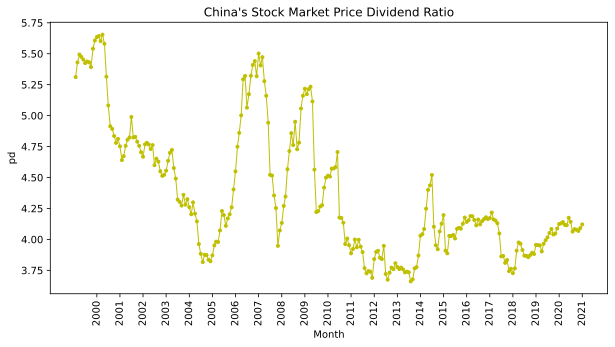

In [52]:
%%time
fig = plt.figure(figsize=(10, 5)) # 图片比例
plt.plot(
    'pd',  # 要画图的变量名
    '.-y',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['2000-01-01':'2021-12-31'])  # 画图的数据
plt.title("China's Stock Market Price Dividend Ratio") # 画图的标题
plt.xlabel('Month') # 画图的x轴名称
plt.ylabel('pd') # 画图的y轴名称

year_freq = pd.date_range(start='2000', end='2022', freq='y')
c = plt.xticks(year_freq, year_freq.year, rotation=90, fontsize=10)


CPU times: total: 46.9 ms
Wall time: 49.9 ms


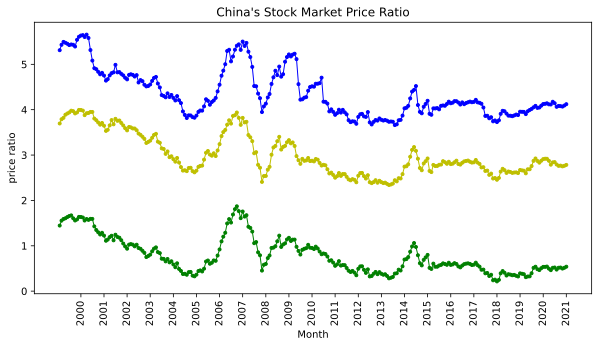

In [53]:
%%time
fig = plt.figure(figsize=(10, 5)) # 图片比例
plt.plot(
    'pd',  # 要画图的变量名
    '.-b',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['2000-01-01':'2021-12-31'])  # 画图的数据
plt.plot(
    'pe',  # 要画图的变量名
    '.-y',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['2000-01-01':'2021-12-31'])
plt.plot(
    'pb',  # 要画图的变量名
    '.-g',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['2000-01-01':'2021-12-31'])
plt.title("China's Stock Market Price Ratio") # 画图的标题
plt.xlabel('Month') # 画图的x轴名称
plt.ylabel('price ratio') # 画图的y轴名称

year_freq = pd.date_range(start='2000', end='2022', freq='y')
c = plt.xticks(year_freq, year_freq.year, rotation=90, fontsize=10)


CPU times: total: 62.5 ms
Wall time: 50.9 ms


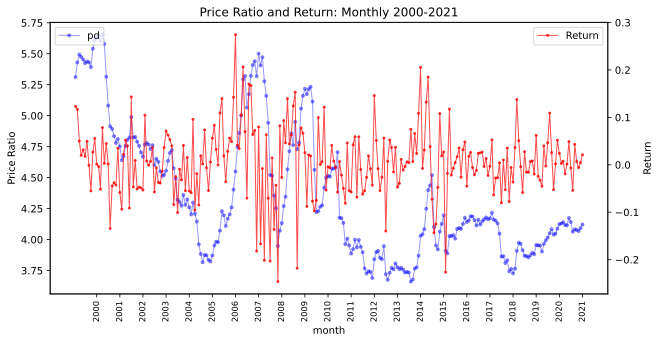

In [54]:
%%time
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(reg_data['pd'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='pd')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('Price Ratio')  # 设置左边纵坐标标签
ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("Price Ratio and Return: Monthly 2000-2021")  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(reg_data['Raw_return'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='Return')
ax2.set_ylabel('Return')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方

year_freq = pd.date_range(start='2000', end='2022', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

In [55]:
reg_data['lpd'] = reg_data['pd'].shift(1)
model_fore_pd = smf.ols('Raw_return ~ lpd',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_pd.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                    0.8778
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.350
Time:                        15:45:04   Log-Likelihood:                 317.85
No. Observations:                 263   AIC:                            -631.7
Df Residuals:                     261   BIC:                            -624.6
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0493      0.044      1.114      0.2

In [56]:
reg_data['lto'] = reg_data['to'].shift(1)
model_fore_to = smf.ols('Raw_return ~ lto',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_to.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.256
Date:                Wed, 23 Nov 2022   Prob (F-statistic):             0.0401
Time:                        15:45:04   Log-Likelihood:                 320.74
No. Observations:                 263   AIC:                            -637.5
Df Residuals:                     261   BIC:                            -630.3
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0145      0.009     -1.664      0.0

In [57]:
reg_data['lto'] = reg_data['to'].shift(1)
model_fore_two = smf.ols('Raw_return ~ lto + lpd',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_two.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     3.060
Date:                Wed, 23 Nov 2022   Prob (F-statistic):             0.0486
Time:                        15:45:04   Log-Likelihood:                 322.83
No. Observations:                 263   AIC:                            -639.7
Df Residuals:                     260   BIC:                            -628.9
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0589      0.040      1.483      0.1

In [58]:
reg_data['fitted_ret'] = model_fore_two.fittedvalues
reg_data

,Log_return,Raw_return,MV,cpi,pd,pb,pe,to,lpd,lto,fitted_ret
month,,,,,,,,,,,
2000-01-31,0.116219,0.123242,0.008258,-0.2,5.311050,1.445262,3.695553,0.475017,NaN,NaN,NaN
2000-02-29,0.110638,0.116990,0.013547,0.7,5.429869,1.553916,3.788974,0.605144,5.311050,0.475017,0.003480
2000-03-31,0.048741,0.049948,0.007877,-0.2,5.493947,1.590367,3.820005,0.765125,5.429869,0.605144,0.012207
2000-04-30,0.019855,0.020053,0.002494,-0.3,5.474707,1.605969,3.888418,0.478694,5.493947,0.765125,0.024404
2000-05-31,0.031218,0.031710,0.003515,0.1,5.453072,1.633036,3.915735,0.348036,5.474707,0.478694,0.000857
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,0.042240,0.043145,0.001956,0.8,4.082353,0.515687,2.761659,0.419196,4.062892,0.387907,0.018559
2021-09-30,0.006814,0.006837,0.001526,0.7,4.078039,0.520634,2.767360,0.365827,4.082353,0.419196,0.020820
2021-10-31,-0.005855,-0.005838,0.000690,1.5,4.068158,0.497318,2.750286,0.226223,4.078039,0.365827,0.016446


CPU times: total: 188 ms
Wall time: 45.9 ms


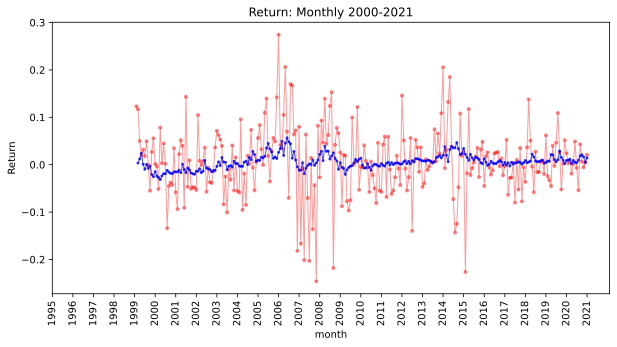

In [59]:
%%time
fig = plt.figure(figsize=(10, 5))

plt.plot(reg_data['Raw_return'],
         color='red',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Return')
plt.xlabel('month')  # 设置横坐标标签
plt.ylabel('Return')  # 设置左边纵坐标标签
#plt.legend(loc=2)  # 设置图例在左上方
plt.title("Return: Monthly 2000-2021")  # 给整张图命名

# ax2 = ax1.twinx()  #twinx()函数表示共享x轴
plt.plot(reg_data['fitted_ret'],
         color='blue',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='fitted_ret')
# ax2.set_ylabel('fitted_mv')  # 设置右边纵坐标标签
# ax2.legend(loc=1)  # 设置图例在右上方

year_freq = pd.date_range(start='1995', end='2022', freq='y')

c = plt.xticks(year_freq, year_freq.year, rotation=90, fontsize=10)


In [60]:
from statsmodels.iolib.summary2 import summary_col
reg_data['lcpi'] = reg_data['cpi'].shift(2)
info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

model_to = smf.ols('Raw_return ~ lto',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_pd = smf.ols('Raw_return ~ lpd',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpi = smf.ols('Raw_return ~ lcpi',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpito = smf.ols('Raw_return ~ lto + lcpi',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_pdto = smf.ols('Raw_return ~ lto + lpd',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_all = smf.ols('Raw_return ~ lto + lpd + lcpi',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(results=[model_to,model_pd, model_cpi, model_cpito,model_pdto,model_all],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=['1', '2', '3','4','5','6'],
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lto','lpd','lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Monthly Stock Market Return')

print(results_table)

    Table - OLS Regressions: Forecast Monthly Stock Market Return
                    1       2        3         4        5        6    
----------------------------------------------------------------------
Intercept        -0.015* 0.049   0.022***  0.003     0.059   0.094*** 
                 (0.009) (0.040) (0.007)   (0.010)   (0.037) (0.036)  
lto              0.068**                   0.063*    0.083** 0.082**  
                 (0.032)                   (0.034)   (0.035) (0.037)  
lpd                      -0.010                      -0.018* -0.022***
                         (0.009)                     (0.009) (0.008)  
lcpi                             -0.008*** -0.007***         -0.008***
                                 (0.002)   (0.002)           (0.002)  
R-squared        0.027   0.005   0.043     0.066     0.042   0.089    
R-squared Adj.   0.023   0.001   0.039     0.059     0.035   0.078    
No. observations 263     263     262       262       263     262      
Standard er

季度结果

In [61]:
Qreg_data = reg_data.resample('Q').apply({
    'Raw_return':
    lambda x: np.exp(sum(np.log( 1 + x))) - 1,
    'to':
    lambda x: sum(x),
    'pd':
    lambda x: np.mean(x),
    'cpi':
    lambda x: sum(x),
})
Qreg_data

,Raw_return,to,pd,cpi
month,,,,
2000-03-31,0.317318,1.845285,5.411622,0.3
2000-06-30,0.071041,1.289940,5.450551,0.3
2000-09-30,-0.009310,0.995907,5.419918,0.8
2000-12-31,0.085501,0.711696,5.593930,2.8
2001-03-31,0.018954,0.520844,5.633003,2.0
...,...,...,...,...
2020-12-31,0.079247,0.760445,4.086465,0.2
2021-03-31,-0.008972,0.814319,4.128985,-0.1
2021-06-30,0.043374,0.771901,4.143594,3.3


In [62]:
Qreg_data['lto'] = Qreg_data['to'].shift(1)
Qreg_data['lcpi'] = Qreg_data['cpi'].shift(1)
Qreg_data['lpd'] = Qreg_data['pd'].shift(1)
model_to = smf.ols('Raw_return ~ lto + lpd + lcpi',
                 data=Qreg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_to.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.820
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           3.85e-05
Time:                        15:45:05   Log-Likelihood:                 57.088
No. Observations:                  87   AIC:                            -106.2
Df Residuals:                      83   BIC:                            -96.31
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3866      0.116      3.327      0.0

In [63]:
from statsmodels.iolib.summary2 import summary_col

info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

model_to = smf.ols('Raw_return ~ lto',
                 data=Qreg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_pd = smf.ols('Raw_return ~ lpd',
                 data=Qreg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpi = smf.ols('Raw_return ~ lcpi',
                 data=Qreg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpito = smf.ols('Raw_return ~ lto + lcpi',
                 data=Qreg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_pdto = smf.ols('Raw_return ~ lto + lpd',
                 data=Qreg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_all = smf.ols('Raw_return ~ lto + lpd + lcpi',
                 data=Qreg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(results=[model_to,model_pd, model_cpi, model_cpito,model_pdto,model_all],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=['1', '2', '3','4','5','6'],
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lto','lpd','lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Quarterly Stock Market Return')

print(results_table)

   Table - OLS Regressions: Forecast Quarterly Stock Market Return
                    1       2        3        4        5         6    
----------------------------------------------------------------------
Intercept        -0.060* 0.291*  0.065***  -0.012   0.321**  0.387*** 
                 (0.032) (0.154) (0.025)   (0.040)  (0.145)  (0.116)  
lto              0.086**                   0.085*   0.115**  0.114**  
                 (0.039)                   (0.044)  (0.047)  (0.051)  
lpd                      -0.062*                    -0.093** -0.097***
                         (0.036)                    (0.037)  (0.028)  
lcpi                             -0.007*** -0.007**          -0.007***
                                 (0.003)   (0.003)           (0.002)  
R-squared        0.081   0.049   0.078     0.156    0.182    0.264    
R-squared Adj.   0.070   0.038   0.067     0.136    0.162    0.238    
No. observations 87      87      87        87       87       87       
Standard e

Explanation

CPU times: total: 250 ms
Wall time: 70.8 ms


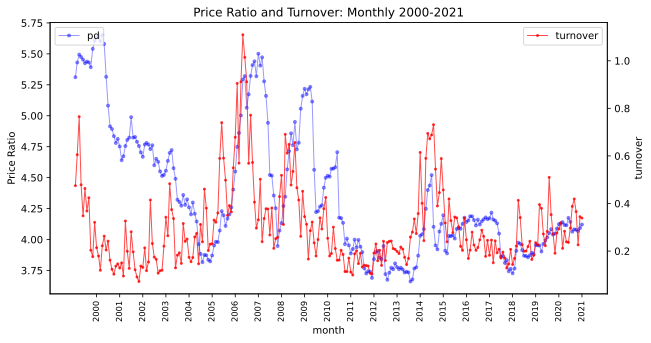

In [64]:
%%time
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(reg_data['pd'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='pd')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('Price Ratio')  # 设置左边纵坐标标签
ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("Price Ratio and Turnover: Monthly 2000-2021")  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(reg_data['to'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='turnover')
ax2.set_ylabel('turnover')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方

year_freq = pd.date_range(start='2000', end='2022', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')


分三段时间两者关系变化

In [109]:
reg_data['lpd'] = reg_data['pd'].shift(1)
model2_to = smf.ols('to ~ lpd',
                 data=reg_data['2000':'2006']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model2_to.summary())

                            OLS Regression Results                            
Dep. Variable:                     to   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4518
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.503
Time:                        15:58:53   Log-Likelihood:                 37.217
No. Observations:                  83   AIC:                            -70.43
Df Residuals:                      81   BIC:                            -65.60
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4250      0.226      1.878      0.0

In [114]:
reg_data['lpd'] = reg_data['pd'].shift(1)
model2_to = smf.ols('to ~ lpd',
                 data=reg_data['2007':'2014']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model2_to.summary())

                            OLS Regression Results                            
Dep. Variable:                     to   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     11.34
Date:                Wed, 23 Nov 2022   Prob (F-statistic):            0.00110
Time:                        15:59:17   Log-Likelihood:                 25.898
No. Observations:                  96   AIC:                            -47.80
Df Residuals:                      94   BIC:                            -42.67
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4740      0.219     -2.160      0.0

In [119]:
reg_data['lpd'] = reg_data['pd'].shift(1)
model2_to = smf.ols('to ~ lpd',
                 data=reg_data['2015':'2021']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model2_to.summary())

                            OLS Regression Results                            
Dep. Variable:                     to   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     6.220
Date:                Wed, 23 Nov 2022   Prob (F-statistic):             0.0146
Time:                        15:59:33   Log-Likelihood:                 60.297
No. Observations:                  84   AIC:                            -116.6
Df Residuals:                      82   BIC:                            -111.7
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3965      0.667     -2.092      0.0

In [120]:
reg_data['lto'] = reg_data['to'].shift(1)
model2_to = smf.ols('pd ~ lto',
                 data=reg_data['2000':'2006']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model2_to.summary())

                            OLS Regression Results                            
Dep. Variable:                     pd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                  0.003311
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.954
Time:                        15:59:33   Log-Likelihood:                -63.289
No. Observations:                  83   AIC:                             130.6
Df Residuals:                      81   BIC:                             135.4
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6461      0.160     28.956      0.0

In [121]:
reg_data['lto'] = reg_data['to'].shift(1)
model2_to = smf.ols('pd ~ lto',
                 data=reg_data['2007':'2014']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model2_to.summary())

                            OLS Regression Results                            
Dep. Variable:                     pd   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     56.28
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           3.49e-11
Time:                        15:59:33   Log-Likelihood:                -57.575
No. Observations:                  96   AIC:                             119.2
Df Residuals:                      94   BIC:                             124.3
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8042      0.107     35.405      0.0

In [122]:
reg_data['lto'] = reg_data['to'].shift(1)
model2_to = smf.ols('pd ~ lto',
                 data=reg_data['2014':'2021']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model2_to.summary())

                            OLS Regression Results                            
Dep. Variable:                     pd   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     6.839
Date:                Wed, 23 Nov 2022   Prob (F-statistic):             0.0104
Time:                        15:59:34   Log-Likelihood:                 44.021
No. Observations:                  96   AIC:                            -84.04
Df Residuals:                      94   BIC:                            -78.91
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8648      0.066     58.897      0.0

CPU times: total: 141 ms
Wall time: 33.9 ms


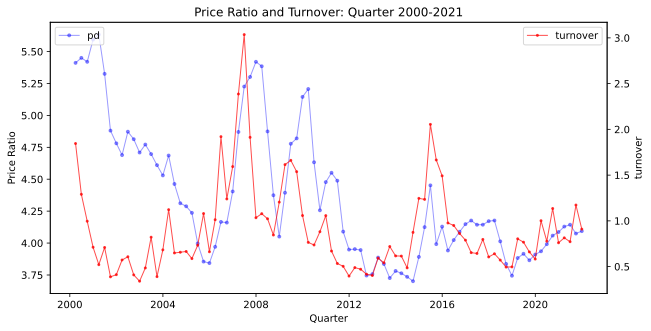

In [123]:
%%time
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(Qreg_data['pd'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='pd')
ax1.set_xlabel('Quarter')  # 设置横坐标标签
ax1.set_ylabel('Price Ratio')  # 设置左边纵坐标标签
ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("Price Ratio and Turnover: Quarter 2000-2021")  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(Qreg_data['to'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='turnover')
ax2.set_ylabel('turnover')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方

#year_freq = pd.date_range(start='2000', end='2022', freq='q')
#ticks = ax1.set_xticks(year_freq)
#labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')
